                                                                                                    
                            Seja bem-vindo(a) à Calculadora Financeira!                             
                                                                                                    
                                                                                                    
                                           MENU PRINCIPAL                                           
                                                                                                    
                                      O que você deseja fazer?                                      
                                                                                                    
1. Inserir Gasto                                   2. Inserir Receita                                
3. Exibir Saldo Atual                              4. Listar Transações                   

C:\Users\kaior\AppData\Local\Temp\ipykernel_1204\1264876356.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.transacoes = pd.concat([self.transacoes, nova_transacao], ignore_index=True)


Receita de R$1500.00 inserida com sucesso.
                                                                                                    
                            Seja bem-vindo(a) à Calculadora Financeira!                             
                                                                                                    
                                                                                                    
                                           MENU PRINCIPAL                                           
                                                                                                    
                                      O que você deseja fazer?                                      
                                                                                                    
1. Inserir Gasto                                   2. Inserir Receita                                
3. Exibir Saldo Atual                          

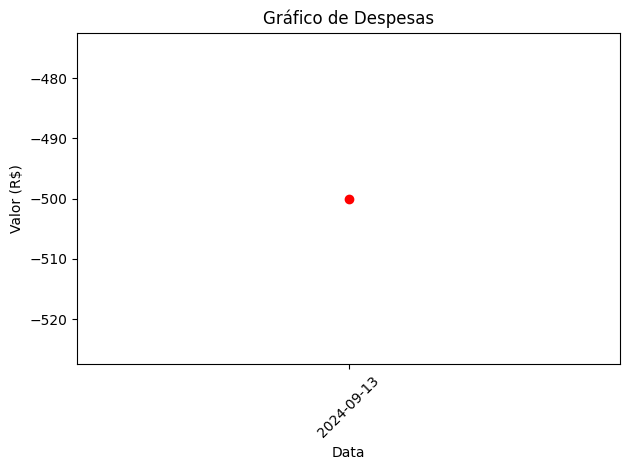

                                                                                                    
                            Seja bem-vindo(a) à Calculadora Financeira!                             
                                                                                                    
                                                                                                    
                                           MENU PRINCIPAL                                           
                                                                                                    
                                      O que você deseja fazer?                                      
                                                                                                    
1. Inserir Gasto                                   2. Inserir Receita                                
3. Exibir Saldo Atual                              4. Listar Transações                   

In [3]:
# Teste 1

import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Classe da Calculadora Financeira
class CalculadoraFinanceira:
    def __init__(self):
        # Criar um DataFrame vazio para armazenar receitas e despesas
        self.transacoes = pd.DataFrame(columns=["Data", "Tipo", "Descrição", "Valor", "Saldo"])
        self.saldo_atual = 0

    # [U.S_2] Inserir Gasto
    def inserir_gasto(self, valor, descricao, categoria="Outros"):
        data_atual = datetime.now().strftime("%Y-%m-%d")
        self.saldo_atual -= valor
        nova_transacao = pd.DataFrame({
            "Data": [data_atual],
            "Tipo": ["Gasto"],
            "Descrição": [descricao],
            "Valor": [-valor],
            "Saldo": [self.saldo_atual],
            "Categoria": [categoria]
        })
        self.transacoes = pd.concat([self.transacoes, nova_transacao], ignore_index=True)
        print(f"Gasto de R${valor:.2f} inserido com sucesso.")

    # [U.S_3] Inserir Receita
    def inserir_receita(self, valor, descricao):
        data_atual = datetime.now().strftime("%Y-%m-%d")
        self.saldo_atual += valor
        nova_transacao = pd.DataFrame({
            "Data": [data_atual],
            "Tipo": ["Receita"],
            "Descrição": [descricao],
            "Valor": [valor],
            "Saldo": [self.saldo_atual],
            "Categoria": ["Receita"]
        })
        self.transacoes = pd.concat([self.transacoes, nova_transacao], ignore_index=True)
        print(f"Receita de R${valor:.2f} inserida com sucesso.")

    # [U.S_4] Exibir Saldo Atual
    def exibir_saldo(self):
        print(f"Seu saldo atual é: R${self.saldo_atual:.2f}")

    # [U.S_5] Armazenar em Excel
    def salvar_excel(self, nome_arquivo="transacoes_financeiras.xlsx"):
        self.transacoes.to_excel(nome_arquivo, index=False)
        print(f"Transações salvas em {nome_arquivo}")

    # [U.S_6] Listar Transações
    def listar_transacoes(self):
        if self.transacoes.empty:
            print("Nenhuma transação registrada.")
        else:
            print(self.transacoes)

    # [U.S_7] Filtrar Transações por Data
    def filtrar_por_data(self, data_inicio, data_fim):
        data_inicio = pd.to_datetime(data_inicio)
        data_fim = pd.to_datetime(data_fim)
        filtradas = self.transacoes[
            (pd.to_datetime(self.transacoes['Data']) >= data_inicio) & 
            (pd.to_datetime(self.transacoes['Data']) <= data_fim)
        ]
        if filtradas.empty:
            print("Nenhuma transação no período especificado.")
        else:
            print(filtradas)

    # [U.S_8] Exibir Saldo por Período
    def saldo_por_periodo(self, data_inicio, data_fim):
        data_inicio = pd.to_datetime(data_inicio)
        data_fim = pd.to_datetime(data_fim)
        filtradas = self.transacoes[
            (pd.to_datetime(self.transacoes['Data']) >= data_inicio) & 
            (pd.to_datetime(self.transacoes['Data']) <= data_fim)
        ]
        if filtradas.empty:
            print("Nenhuma transação no período especificado.")
        else:
            saldo_periodo = filtradas['Valor'].sum()
            print(f"Saldo no período de {data_inicio.date()} a {data_fim.date()}: R${saldo_periodo:.2f}")

    # [U.S_9] Gerar Gráfico de Despesas
    def gerar_grafico_despesas(self):
        despesas = self.transacoes[self.transacoes['Tipo'] == 'Gasto']
        if despesas.empty:
            print("Nenhuma despesa registrada.")
        else:
            plt.plot(despesas['Data'], despesas['Valor'], marker='o', color='r')
            plt.title("Gráfico de Despesas")
            plt.xlabel("Data")
            plt.ylabel("Valor (R$)")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # [U.S_10] Previsão de Saldo Futuro
    def previsao_saldo_futuro(self, dias):
        media_despesas_diaria = self.transacoes[self.transacoes['Tipo'] == 'Gasto']['Valor'].mean()
        saldo_futuro = self.saldo_atual + (media_despesas_diaria * dias)
        print(f"Previsão de saldo para os próximos {dias} dias: R${saldo_futuro:.2f}")

    # [U.S_11] Alerta de Gastos Excessivos
    def alerta_gastos(self, limite):
        total_gastos = self.transacoes[self.transacoes['Tipo'] == 'Gasto']['Valor'].sum()
        if total_gastos > limite:
            print(f"Atenção! Seus gastos já ultrapassaram o limite de R${limite:.2f}.")
        else:
            print(f"Seus gastos estão dentro do limite de R${limite:.2f}.")

    # [U.S_12] Categorias de Gastos
    def inserir_gasto_com_categoria(self, valor, descricao, categoria):
        self.inserir_gasto(valor, descricao, categoria)

    # [U.S_13] Resumo Financeiro Mensal
    def resumo_mensal(self, mes, ano):
        transacoes_mes = self.transacoes[
            (pd.to_datetime(self.transacoes['Data']).dt.month == mes) & 
            (pd.to_datetime(self.transacoes['Data']).dt.year == ano)
        ]
        total_receitas = transacoes_mes[transacoes_mes['Tipo'] == 'Receita']['Valor'].sum()
        total_gastos = transacoes_mes[transacoes_mes['Tipo'] == 'Gasto']['Valor'].sum()
        saldo_mes = total_receitas + total_gastos
        print(f"Resumo do mês {mes}/{ano}:\nTotal de Receitas: R${total_receitas:.2f}\nTotal de Gastos: R${-total_gastos:.2f}\nSaldo Final: R${saldo_mes:.2f}")

    # [U.S_14] Objetivos Financeiros
    def definir_objetivo(self, valor_meta):
        if self.saldo_atual >= valor_meta:
            print(f"Você já atingiu sua meta financeira de R${valor_meta:.2f}.")
        else:
            restante = valor_meta - self.saldo_atual
            print(f"Faltam R${restante:.2f} para atingir sua meta financeira.")

    # [U.S_15] Sugestões de Poupança
    def sugestao_poupanca(self):
        categoria_maior_gasto = self.transacoes[self.transacoes['Tipo'] == 'Gasto']['Categoria'].mode()[0]
        print(f"Você está gastando mais em {categoria_maior_gasto}. Considere reduzir seus gastos nesta categoria.")

    # [U.S_16] Análise de Tendências de Consumo
    def tendencias_consumo(self):
        dias_com_mais_gastos = self.transacoes[self.transacoes['Tipo'] == 'Gasto']['Data'].mode()[0]
        print(f"Você tende a gastar mais nos dias {dias_com_mais_gastos}. Planeje-se para esses dias e evite gastos excessivos.")

    # [U.S_17] Comparativo Mensal
    def comparativo_mensal(self, ano):
        transacoes_ano = self.transacoes[pd.to_datetime(self.transacoes['Data']).dt.year == ano]
        if transacoes_ano.empty:
            print(f"Nenhuma transação registrada para o ano {ano}.")
        else:
            transacoes_ano['Mes'] = pd.to_datetime(transacoes_ano['Data']).dt.month
            comparativo = transacoes_ano.groupby('Mes')['Valor'].sum()
            comparativo.plot(kind='bar', color='b')
            plt.title(f"Comparativo Mensal de Gastos e Receitas - {ano}")
            plt.xlabel("Mês")
            plt.ylabel("Valor (R$)")
            plt.show()

            # Função para limpar a tela
    def limpar_tela(self):
        os.system('cls' if os.name == 'nt' else 'clear')

def main():
    calculadora = CalculadoraFinanceira()

    while True:
        calculadora.limpar_tela()
        
        print("="*100)
        print(" "*100)
        print(f"{'Seja bem-vindo(a) à Calculadora Financeira!':^100}")
        print(" "*100)
        print("="*100)
        print(" "*100)
        print(f"{'MENU PRINCIPAL':^100}") 
        print(" "*100)
        print("="*100)
        print(f"{'O que você deseja fazer?':^100}")
        print(" "*100)
        print(f"{'1. Inserir Gasto':<50} {'2. Inserir Receita':<50}")
        print(f"{'3. Exibir Saldo Atual':<50} {'4. Listar Transações':<50}")
        print(f"{'5. Filtrar Transações por Data':<50} {'6. Exibir Saldo por Período':<50}")
        print(f"{'7. Salvar Transações em Excel':<50} {'8. Gerar Gráfico de Despesas':<50}")
        print(f"{'9. Previsão de Saldo Futuro':<50} {'10. Alerta de Gastos Excessivos':<50}")
        print(f"{'11. Inserir Gasto com Categoria':<50} {'12. Resumo Financeiro Mensal':<50}")
        print(f"{'13. Definir Objetivo Financeiro':<50} {'14. Sugestões de Poupança':<50}")
        print(f"{'13. DAnálise de Tendências de Consumo':<50} {'14. Comparativo Mensal':<50}")
        print(f"{'10. Sair")':<50}")
        print("="*100)
        
        opcao = input("Escolha uma opção: ")

        if opcao == "1":
            valor = float(input("Valor do gasto: R$"))
            descricao = input("Descrição do gasto: ")
            calculadora.inserir_gasto(valor, descricao)
        elif opcao == "2":
            valor = float(input("Valor da receita: R$"))
            descricao = input("Descrição da receita: ")
            calculadora.inserir_receita(valor, descricao)
        elif opcao == "3":
            calculadora.exibir_saldo()
        elif opcao == "4":
            calculadora.listar_transacoes()
        elif opcao == "5":
            data_inicio = input("Data de início (AAAA-MM-DD): ")
            data_fim = input("Data de fim (AAAA-MM-DD): ")
            calculadora.filtrar_por_data(data_inicio, data_fim)
        elif opcao == "6":
            data_inicio = input("Data de início (AAAA-MM-DD): ")
            data_fim = input("Data de fim (AAAA-MM-DD): ")
            calculadora.saldo_por_periodo(data_inicio, data_fim)
        elif opcao == "7":
            nome_arquivo = input("Nome do arquivo Excel (ex: transacoes.xlsx): ")
            calculadora.salvar_excel(nome_arquivo)
        elif opcao == "8":
            calculadora.gerar_grafico_despesas()
        elif opcao == "9":
            dias = int(input("Número de dias para a previsão de saldo: "))
            calculadora.previsao_saldo_futuro(dias)
        elif opcao == "10":
            limite = float(input("Defina o limite de gastos: R$"))
            calculadora.alerta_gastos(limite)
        elif opcao == "11":
            valor = float(input("Valor do gasto: R$"))
            descricao = input("Descrição do gasto: ")
            categoria = input("Categoria do gasto: ")
            calculadora.inserir_gasto_com_categoria(valor, descricao, categoria)
        elif opcao == "12":
            mes = int(input("Informe o mês (1-12): "))
            ano = int(input("Informe o ano: "))
            calculadora.resumo_mensal(mes, ano)
        elif opcao == "13":
            valor_meta = float(input("Informe o valor da meta financeira: R$"))
            calculadora.definir_objetivo(valor_meta)
        elif opcao == "14":
            calculadora.sugestao_poupanca()
        elif opcao == "15":
            calculadora.tendencias_consumo()
        elif opcao == "16":
            ano = int(input("Informe o ano: "))
            calculadora.comparativo_mensal(ano)
        elif opcao == "0":
            print("Saindo... Até a próxima!")
            break
        else:
            print("Opção inválida, tente novamente.")

if __name__ == "__main__":
    main()


In [ ]:
# Teste 2

calculadora = CalculadoraFinanceira()

calculadora.inserir_receita(2000, "Salário")

calculadora.inserir_gasto(600, "Supermercado")

calculadora.inserir_receita(100, "Mesada")

calculadora.inserir_gasto(20, "Tigrinho")

calculadora.exibir_saldo()

calculadora.gerar_grafico_despesas()

calculadora.listar_transacoes()

In [ ]:
# Teste 3

import ipywidgets as widgets
from IPython.display import display

def inserir_gasto_evento(valor, descricao):
    calculadora.inserir_gasto(valor, descricao)

def inserir_receita_evento(valor, descricao):
    calculadora.inserir_receita(valor, descricao)

valor_gasto = widgets.FloatText(description='Valor do Gasto:')
descricao_gasto = widgets.Text(description='Descrição do Gasto:')
botao_gasto = widgets.Button(description="Inserir Gasto")
botao_gasto.on_click(lambda x: inserir_gasto_evento(valor_gasto.value, descricao_gasto.value))

valor_receita = widgets.FloatText(description='Valor da Receita:')
descricao_receita = widgets.Text(description='Descrição da Receita:')
botao_receita = widgets.Button(description="Inserir Receita")
botao_receita.on_click(lambda x: inserir_receita_evento(valor_receita.value, descricao_receita.value))

display(valor_gasto, descricao_gasto, botao_gasto)
display(valor_receita, descricao_receita, botao_receita)


In [ ]:
# Teste 4

import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime

class CalculadoraFinanceira:
    def __init__(self):
        self.transacoes = []
        self.saldo_atual = 0
        self.create_widgets()

    def create_widgets(self):
        self.label_saldo = widgets.Label(value=f'Saldo Atual: R${self.saldo_atual:.2f}')
        self.button_gasto = widgets.Button(description='Inserir Gasto')
        self.button_receita = widgets.Button(description='Inserir Receita')
        self.button_saldo = widgets.Button(description='Exibir Saldo')
        self.button_salvar = widgets.Button(description='Salvar em Excel')

        self.button_gasto.on_click(self.inserir_gasto)
        self.button_receita.on_click(self.inserir_receita)
        self.button_saldo.on_click(self.exibir_saldo)
        self.button_salvar.on_click(self.salvar_excel)

        display(self.label_saldo, self.button_gasto, self.button_receita, self.button_saldo, self.button_salvar)

    def inserir_gasto(self, b):
        valor_widget = widgets.FloatText(description='Valor:')
        descricao_widget = widgets.Text(description='Descrição:')
        button_submit = widgets.Button(description='Registrar Gasto')

        display(valor_widget, descricao_widget, button_submit)

        def on_submit_gasto(b):
            try:
                valor = valor_widget.value
                descricao = descricao_widget.value
                self.transacoes.append({"Data": datetime.now().strftime('%Y-%m-%d %H:%M:%S'), "Tipo": "Gasto", "Descrição": descricao, "Valor": -valor})
                self.saldo_atual -= valor
                self.label_saldo.value = f'Saldo Atual: R${self.saldo_atual:.2f}'
                clear_output(wait=True)
                self.create_widgets()
                print(f"Gasto de R${valor:.2f} registrado.")
            except ValueError:
                print('Valor inválido. Por favor, insira um número.')

        button_submit.on_click(on_submit_gasto)

    def inserir_receita(self, b):
        valor_widget = widgets.FloatText(description='Valor:')
        descricao_widget = widgets.Text(description='Descrição:')
        button_submit = widgets.Button(description='Registrar Receita')

        display(valor_widget, descricao_widget, button_submit)

        def on_submit_receita(b):
            try:
                valor = valor_widget.value
                descricao = descricao_widget.value
                self.transacoes.append({"Data": datetime.now().strftime('%Y-%m-%d %H:%M:%S'), "Tipo": "Receita", "Descrição": descricao, "Valor": valor})
                self.saldo_atual += valor
                self.label_saldo.value = f'Saldo Atual: R${self.saldo_atual:.2f}'
                clear_output(wait=True)
                self.create_widgets()
                print(f"Receita de R${valor:.2f} registrada.")
            except ValueError:
                print('Valor inválido. Por favor, insira um número.')

        button_submit.on_click(on_submit_receita)

    def exibir_saldo(self, b):
        print(f"Seu saldo atual é: R${self.saldo_atual:.2f}")

    def salvar_excel(self, b):
        try:
            df = pd.DataFrame(self.transacoes)
            df.to_excel('transacoes.xlsx', index=False)
            print('Transações salvas no arquivo transacoes.xlsx.')
        except Exception as e:
            print(f'Erro ao salvar arquivo: {str(e)}')

# Executar a calculadora financeira
app = CalculadoraFinanceira()


In [1]:
import os
import pandas as pd
from datetime import datetime

# Classe da Calculadora Financeira
class CalculadoraFinanceira:
    def __init__(self):
        # Criar um DataFrame vazio para armazenar receitas e despesas
        self.transacoes = pd.DataFrame(columns=["Data", "Tipo", "Descrição", "Valor", "Saldo", "Categoria"])
        self.saldo_atual = 0

    # Inserir Gasto
    def inserir_gasto(self, valor, descricao, categoria="Outros"):
        data_atual = datetime.now().strftime("%Y-%m-%d")
        self.saldo_atual -= valor
        nova_transacao = pd.DataFrame({
            "Data": [data_atual],
            "Tipo": ["Gasto"],
            "Descrição": [descricao],
            "Valor": [-valor],
            "Saldo": [self.saldo_atual],
            "Categoria": [categoria]
        })
        self.transacoes = pd.concat([self.transacoes, nova_transacao], ignore_index=True)
        print(f"\nGasto de R${valor:.2f} inserido com sucesso.")

    # Inserir Receita
    def inserir_receita(self, valor, descricao):
        data_atual = datetime.now().strftime("%Y-%m-%d")
        self.saldo_atual += valor
        nova_transacao = pd.DataFrame({
            "Data": [data_atual],
            "Tipo": ["Receita"],
            "Descrição": [descricao],
            "Valor": [valor],
            "Saldo": [self.saldo_atual],
            "Categoria": ["Receita"]
        })
        self.transacoes = pd.concat([self.transacoes, nova_transacao], ignore_index=True)
        print(f"\nReceita de R${valor:.2f} inserida com sucesso.")

    # Exibir Saldo Atual
    def exibir_saldo(self):
        print(f"\nSeu saldo atual é: R${self.saldo_atual:.2f}")

# Função para limpar a tela
def limpar_tela():
    if os.name == 'nt':  # Se for Windows
        os.system('cls')
    else:  # Se for Linux ou macOS
        os.system('clear')

# Função para exibir o menu principal
def exibir_menu():
    limpar_tela()  # Limpa a tela antes de exibir o menu
    print("="*100)
    print(" "*100)
    print(f"{'Seja bem-vindo(a) à Calculadora Financeira!':^100}")
    print(" "*100)
    print("="*100)
    print(" "*100)
    print(f"{'MENU PRINCIPAL':^100}") 
    print(" "*100)
    print("="*100)
    print(f"{'O que você deseja fazer?':^100}")
    print(" "*100)
    print(f"{'1. Inserir Gasto':<50} {'2. Inserir Receita':<50}")
    print(f"{'3. Exibir Saldo Atual':<50} {'4. Sair':<50}")
    print("="*100)

# Função principal
def main():
    calculadora = CalculadoraFinanceira()

    while True:
        exibir_menu()
        opcao = input("Escolha uma opção: ")

        if opcao == "1":
            valor = float(input("Valor do gasto: R$"))
            descricao = input("Descrição do gasto: ")
            calculadora.inserir_gasto(valor, descricao)
        elif opcao == "2":
            valor = float(input("Valor da receita: R$"))
            descricao = input("Descrição da receita: ")
            calculadora.inserir_receita(valor, descricao)
        elif opcao == "3":
            calculadora.exibir_saldo()
        elif opcao == "4":
            print("\nSeus dados foram salvos com sucesso. Desligando...")
            break
        else:
            print("\nOpção inválida, tente novamente.")

        # Pergunta ao usuário se deseja retornar ao menu
        print("\nDeseja exibir o menu novamente? (1 - Sim, 2 - Não)")
        resposta = input("Escolha uma opção: ")

        if resposta == "1":
            continue
        else:
            print("\nSeus dados foram salvos com sucesso. Desligando...")
            break

if __name__ == "__main__":
    main()
